In [9]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from ua_datasets import NewsClassificationDataset
import os

In [11]:
raw_data_path = '../data/raw'
csv_file = os.path.join(raw_data_path, 'train.csv')

if not os.path.exists(csv_file):
    dataset = NewsClassificationDataset(root=raw_data_path)
else:
    print("all set")

df = pd.read_csv(csv_file)

print(f"Всього новин завантажено: {len(df)}")
print("\n--- 10 прикладів даних (Title та Target) ---")
display(df[['title', 'target']].head(10))

all set
Всього новин завантажено: 120417

--- 10 прикладів даних (Title та Target) ---


,title,target
0,"ВЕРНИДУБ: «Наносимо 25 ударів, 15 у ворота, а ...",спорт
1,"У ""Київстар"" заявляють, що їх обшукала ДФС",новини
2,В 2016 році 1% найзаможніших людей вперше ста...,новини
3,Шакіл О’Ніл продав шикарний маєток у Флориді в...,спорт
4,"У «заблокованій» СБУ B2B Jewelry заявили, що п...",бізнес
5,На Донеччині зафіксували сьомий випадок корон...,новини
6,В українських кінотеатрах вперше покажуть філ...,новини
7,Тематикою новорічного свята на Софійській пло...,новини
8,Нардепи від “ЄС” ініціювали розслідування міл...,політика
9,Facebook запустила сервіс для знайомств в Європі,технології


Кількість текстів: 120417
Медіанна довжина в словах: 126.0
Медіанна довжина в символах: 896.0

--- Розподіл категорій ---
target
політика      40364
спорт         28438
новини        25209
бізнес        14759
технології    11647
Name: count, dtype: int64


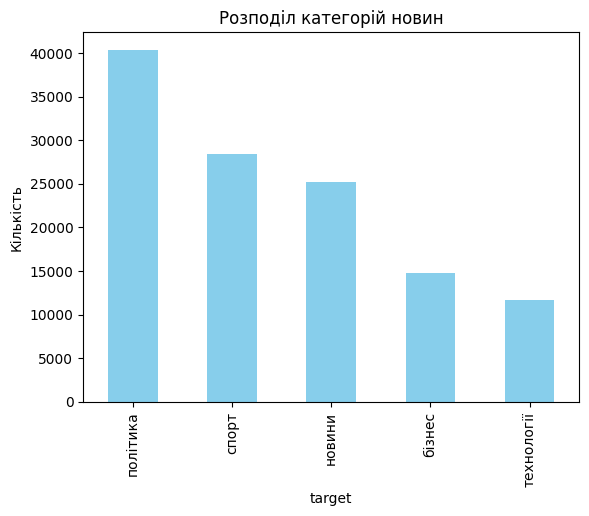

In [12]:
# Розрахунок довжини текстів
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))
df['char_count'] = df['text'].astype(str).apply(len)

print(f"Кількість текстів: {len(df)}")
print(f"Медіанна довжина в словах: {df['word_count'].median()}")
print(f"Медіанна довжина в символах: {df['char_count'].median()}")

# Розподіл класів
print("\n--- Розподіл категорій ---")
print(df['target'].value_counts())
df['target'].value_counts().plot(kind='bar', title='Розподіл категорій новин', color='skyblue')
plt.ylabel('Кількість')
plt.show()

In [13]:
def lab1_normalization(text):
    text = str(text)
    # Уніфікація апострофа
    text = text.replace("'", "’").replace("`", "’").replace("‘", "’")
    # Заміна URL та Email на теги
    text = re.sub(r'https?://\S+|www\.\S+', '<URL>', text)
    text = re.sub(r'\S+@\S+', '<EMAIL>', text)
    # Видалення зайвих пробілів та переносів
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['processed_text'] = df['text'].apply(lab1_normalization)
print("Приклад нормалізованого тексту:")
print(df['processed_text'].iloc[0][:200] + "...")

Приклад нормалізованого тексту:
Головний тренер солігорського «Шахтаря» Юрій Вернидуб на післяматчевій прес-конференції пояснив, чому його підопічні програли команді «Слуцьк» (1:2): «Такого початку я не пам’ятаю у своєму житті. Але ...


In [14]:
# 1. Точні дублікати
duplicates_count = df.duplicated(subset=['text']).sum()
# 2. Порожні або дуже короткі
short_texts = (df['word_count'] < 5).sum()
# 3. "Сміттєві" рядки (тільки цифри/пунктуація)
junk_rows = df[df['text'].astype(str).str.match(r'^[0-9\W\s]+$')].shape[0]

print(f"Точні дублікати: {duplicates_count} ({duplicates_count/len(df)*100:.2f}%)")
print(f"Тексти менше 5 слів: {short_texts}")
print(f"Сміттєві рядки: {junk_rows}")

Точні дублікати: 703 (0.58%)
Тексти менше 5 слів: 30
Сміттєві рядки: 3


In [19]:
df['processed_text'] = df['text'].apply(lab1_normalization)

output_path = '../data/processed.csv'
labels_path = '../data/raw/labels.csv'

os.makedirs(os.path.dirname(output_path), exist_ok=True)
os.makedirs(os.path.dirname(labels_path), exist_ok=True)

df[['target', 'processed_text']].to_csv(output_path, index=False, encoding='utf-8')
pd.DataFrame(df['target'].unique(), columns=['label']).sort_values('label').to_csv(labels_path, index=False)

print(f"Оброблено {len(df)} новин")
print(f"{output_path}")

Оброблено 120417 новин
../data/processed.csv
